In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [10]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'

df = pd.read_csv(data_url)

df = df[(df['BMI'].astype('int') != 0)  & (df['Glucose'].astype('int') != 0)]

df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
# Independent
X = df['BMI'].to_numpy().reshape(-1,1)

# Dependent
y = df['Glucose'].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)



LinearRegression()

In [17]:
y_pred = regr.predict(X_test)

In [20]:
print(f'Coef of det: {regr.coef_}')

print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

print(f'r squared: {r2_score(y_test, y_pred)}')

Coef of det: [[0.99467842]]
Mean squared error: 802.2621046367846
r squared: 0.06993380604584298


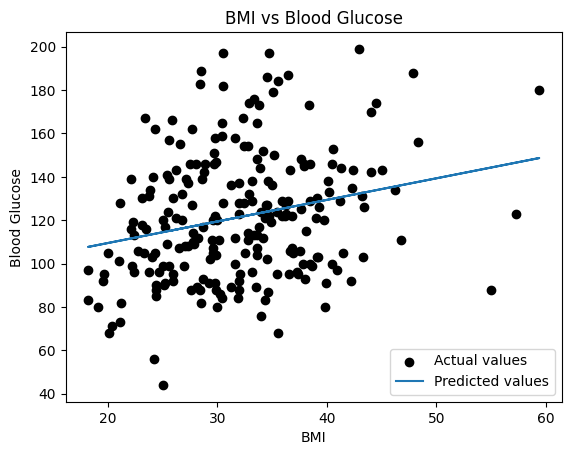

In [28]:
plt.scatter(X_test, y_test, color="black", label='Actual values')
plt.plot(X_test, y_pred, label='Predicted values')

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI vs Blood Glucose')

plt.legend(loc="lower right")

plt.show()

In [37]:
prediciton_df = pd.DataFrame()

prediciton_df['BMI'] = np.arange(60, 71)

prediciton_df['Glucose'] = regr.predict(np.arange(60,71).reshape(-1,1))

prediciton_df

,BMI,Glucose
0,60,149.259429
1,61,150.254108
2,62,151.248786
3,63,152.243464
4,64,153.238143
5,65,154.232821
6,66,155.227500
7,67,156.222178
8,68,157.216857
9,69,158.211535


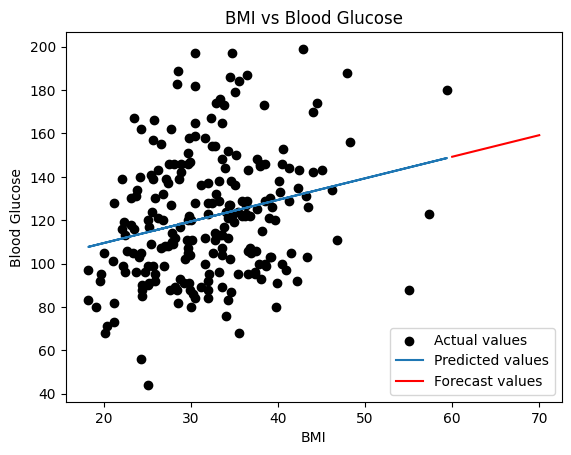

In [38]:
plt.scatter(X_test, y_test, color="black", label='Actual values')
plt.plot(X_test, y_pred, label='Predicted values')
plt.plot(prediciton_df['BMI'], prediciton_df['Glucose'], color='Red', label='Forecast values')

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI vs Blood Glucose')

plt.legend(loc="lower right")

plt.show()

In [41]:
# selecting data
df = df[df['Insulin'].astype('int') != 0]

X = df[['BMI', 'Insulin']]
y = df['Glucose'].to_numpy().reshape(-1,1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# fitting and predicting
mv_regr = linear_model.LinearRegression()

mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)

# look at model quality
print(f'Coef Det: {mv_regr.coef_}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R squared: {r2_score(y_test, y_pred)}')

# make predicitons
mv_regr.predict(pd.DataFrame(
    [
        {'BMI':29,
        'Insulin':94}
    ]
))

Coef Det: [[0.42359183 0.16437135]]
MSE: 763.1831952653552
R squared: 0.17661432608415184


array([[110.81602826]])